<a href="https://colab.research.google.com/github/weso500/1B-Shared/blob/main/FPCA_LOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
test_data = pd.read_csv('/content/training_fault.csv', header=None)
#test_data = test_data.iloc[1:].sample(n=100)

In [ ]:
train_data = pd.read_csv('/content/training.csv', header=None)
#Goodtest = train_data.tail(100).copy()  # Use .copy() to avoid SettingWithCopyWarning

# Drop the last 100 rows from the original DataFrame
#train_data = train_data.iloc[:-100]

In [ ]:
print(train_data.shape)
print(test_data.shape)

(400, 832)
(200, 832)


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import OneClassSVM
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest
clf = LocalOutlierFactor(novelty=True)
clf.fit(train_data.values)

LocalOutlierFactor(novelty=True)

In [ ]:
Prediction = []
for i in range(test_data.shape[0]):
  row = test_data.iloc[[i]]
  pred = clf.score_samples(row)*-1
  Prediction.append(pred)

0.4482758620689655


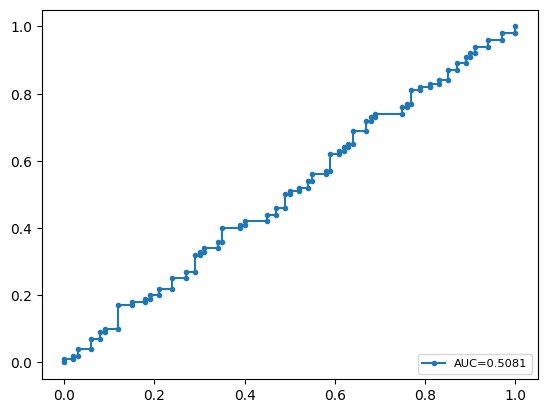

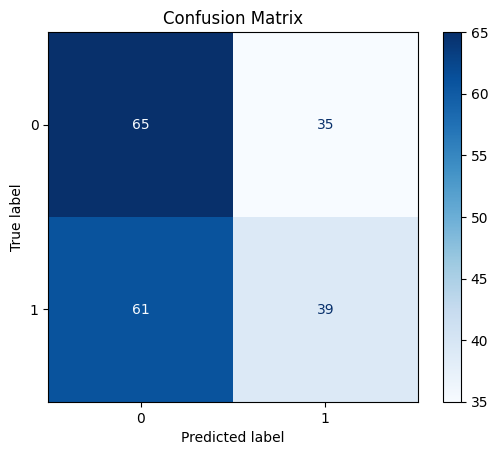

In [ ]:
Fulloutput = Prediction
Ynorm = np.ones(100)
Yanom = np.zeros(100)
Y = np.concatenate([Ynorm, Yanom])
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
fpr, tpr, thresholds = metrics.roc_curve(Y, Fulloutput , pos_label=1)
loss_threshold = thresholds[np.argmax(tpr-fpr)]
for i in range(len(Fulloutput)):
  if Fulloutput[i] > loss_threshold:
    Fulloutput[i] = 1
  else:
    Fulloutput[i] = 0
cm = confusion_matrix(Y, Fulloutput)
f1 = f1_score(Y, Fulloutput)
print(f1)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,marker='.',label="AUC="+str(auc))
plt.legend(loc='lower right', prop={'size': 8.2})
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()